In [8]:
import pandas as pd


In [9]:
df=pd.read_csv('Student_Performance.csv')
df.head()

,Hours Studied,Previous Scores,Extracurricular Activities,Sleep Hours,Sample Question Papers Practiced,Performance Index
0,7,99,Yes,9,1,91.0
1,4,82,No,4,2,65.0
2,8,51,Yes,7,2,45.0
3,5,52,Yes,5,2,36.0
4,7,75,No,8,5,66.0


In [23]:
df.shape

(10000, 6)

In [10]:
from sklearn.preprocessing import OneHotEncoder

encoder=OneHotEncoder(sparse_output=False)
ohe=encoder.fit_transform(df[['Extracurricular Activities']])
ohe_df=pd.DataFrame(ohe,columns=encoder.get_feature_names_out(['Extracurricular Activities']))
ohe_df.drop('Extracurricular Activities_No',axis=1,inplace=True)
df.drop('Extracurricular Activities',axis=1,inplace=True)
df=pd.concat([df,ohe_df],axis=1)

In [11]:
df.head()

,Hours Studied,Previous Scores,Sleep Hours,Sample Question Papers Practiced,Performance Index,Extracurricular Activities_Yes
0,7,99,9,1,91.0,1.0
1,4,82,4,2,65.0,0.0
2,8,51,7,2,45.0,1.0
3,5,52,5,2,36.0,1.0
4,7,75,8,5,66.0,0.0


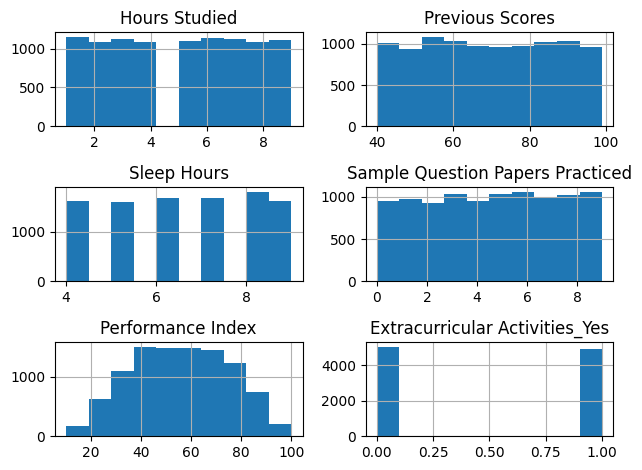

In [12]:
import seaborn as sns
import matplotlib.pyplot as plt

numeric=df.select_dtypes('number')
numeric.hist()
plt.tight_layout()

In [19]:
from sklearn.preprocessing import MinMaxScaler

scaler=MinMaxScaler()
x=['Hours Studied','Previous Scores','Sleep Hours','Sample Question Papers Practiced']
df[x]=scaler.fit_transform(df[x])

In [20]:
df.head()

,Hours Studied,Previous Scores,Sleep Hours,Sample Question Papers Practiced,Performance Index,Extracurricular Activities_Yes
0,0.750,1.000000,1.0,0.111111,91.0,1.0
1,0.375,0.711864,0.0,0.222222,65.0,0.0
2,0.875,0.186441,0.6,0.222222,45.0,1.0
3,0.500,0.203390,0.2,0.222222,36.0,1.0
4,0.750,0.593220,0.8,0.555556,66.0,0.0


In [28]:
X=df[['Hours Studied','Previous Scores','Sleep Hours','Sample Question Papers Practiced','Extracurricular Activities_Yes']]
y=df['Performance Index']

In [29]:
from sklearn.model_selection import train_test_split

X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.2,random_state=10)


In [30]:
from sklearn.linear_model import LinearRegression

model=LinearRegression()
model.fit(X_train,y_train)

,fit_intercept,True
,copy_X,True
,tol,1e-06
,n_jobs,None
,positive,False


In [31]:
model.predict([[0.375,0.711864,0.0,0.222222,0.0]])

d:\DataScience-Learning-Roadmap\venv\Lib\site-packages\sklearn\utils\validation.py:2749: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


array([63.1700538])

In [32]:
model.predict(X_test)

array([41.47902964, 26.80356121, 34.25396502, ..., 46.55583459,
       67.91222593, 59.16766817], shape=(2000,))

In [33]:
model.score(X_test,y_test)

0.9886543202866286